In [1]:
import os
import pathlib
from pathlib import Path

if Path(os.getcwd()).match("notebooks"):
    os.chdir("..")
os.getcwd()

'/Users/dean/projects/kaggle-gw'

In [2]:
import sys
from typing import Tuple, Optional

from typeguard import typechecked

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

import gw_data
from preprocessors import filter_sig, qtransform
from preprocessor_meta import FILTER_TIMES, qtransform_meta, filter_sig_meta

In [3]:
DATA_DIR = Path('g2net-data-000')

In [4]:
# Suitable for a 2020ish MacBook Pro
plt.rcParams['figure.dpi']= 140

SMALL_FONT_SIZE = 6
MEDIUM_FONT_SIZE = 8
BIGGER_FONT_SIZE = 10

plt.rc('font', size=SMALL_FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT_SIZE)  # fontsize of the figure title

In [5]:
SIGNAL_COLORS = ['red', 'green', 'blue']

def plot_filter_line(ax, sigs, idx, left: int = 0, right: Optional[int] = None):
    right = right or len(sigs[idx])
    
    ax.minorticks_on()
    ax.grid(which='major', color='#555555', linestyle='-', linewidth=0.7)
    ax.grid(which='minor', color='#AAAAAA', linestyle=':', linewidth=0.5)
    ax.set_axisbelow(False)

    ax.plot(FILTER_TIMES[left:right],
            sigs[idx][left:right],
            SIGNAL_COLORS[idx])

@typechecked
def plot_filter_sigs(_id: str, sigs: np.ndarray, left: int = 0, right: Optional[int] = None):
    fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=[6, 5])
    for i in range(3):
        plot_filter_line(axs[i], sigs, i, left, right)
    fig.suptitle(f'id={_id}')

In [6]:
@typechecked
def plot_sig_q(filter_sig: np.ndarray, avoid_normalization=False):
    if filter_sig.shape != filter_sig_meta.output_shape[1:]:
        raise ValueError(f"expected shape {filter_sig_meta.output_shape[1:]}; got {filter_sig.shape}")
    times, freqs, plane = qtransform.qtransform_sig(filter_sig, qtransform_meta.output_shape[1:],
                                                    avoid_normalization=avoid_normalization)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6, 2])
    # originally, we had vmax=15, vmin=0, 
    ax.pcolormesh(times, freqs, plane, cmap='viridis', shading='auto')
    ax.minorticks_on()
    ax.grid(which='major', color='#DDDDDD', linestyle='-', linewidth=0.7)
    ax.grid(which='minor', color='#CCCCCC', linestyle=':', linewidth=0.5)
    ax.set_axisbelow(False)
    plt.show()

In [7]:
test_id = '000a218fdd'
test_sigs = np.load(gw_data.train_file(DATA_DIR, test_id))

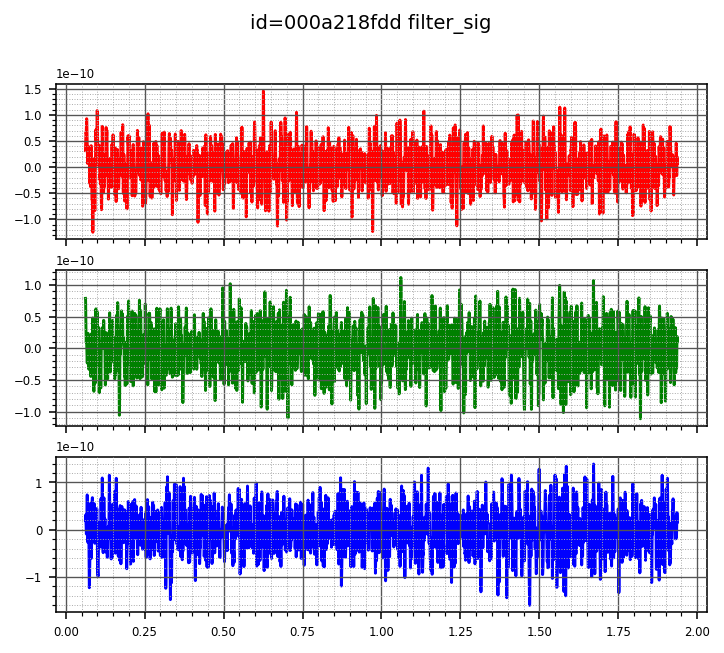

In [8]:
test_filtered = filter_sig.process(test_sigs)
plot_filter_sigs(test_id + " filter_sig", test_filtered)

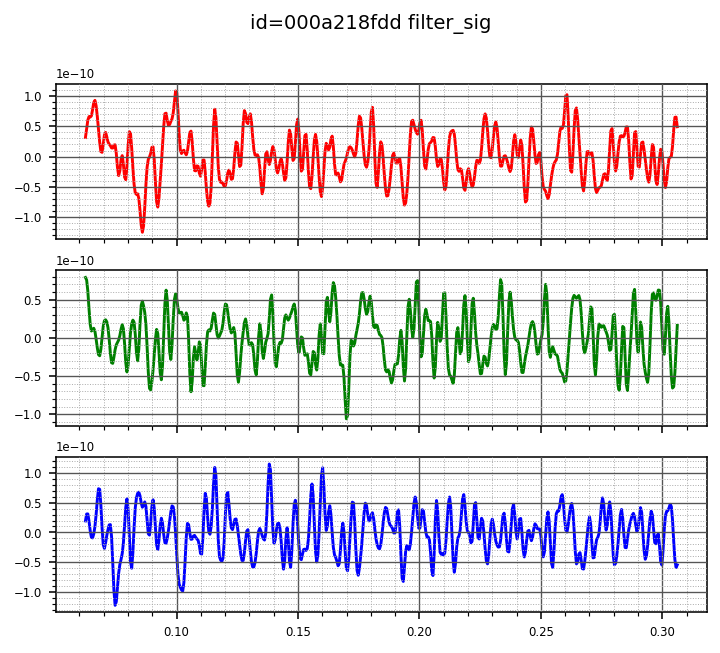

In [9]:
plot_filter_sigs(test_id + " filter_sig", test_filtered, right=500)

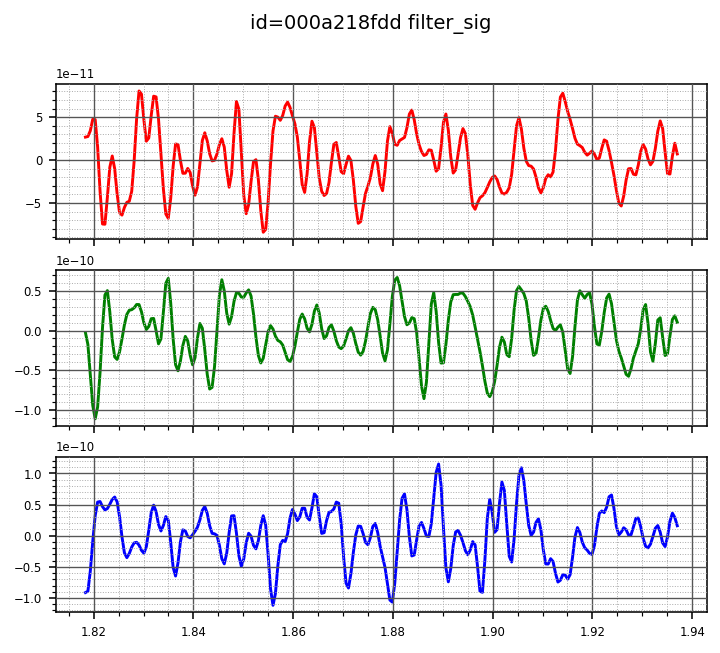

In [10]:
plot_filter_sigs(test_id + " filter_sig", test_filtered, left=4096-500)

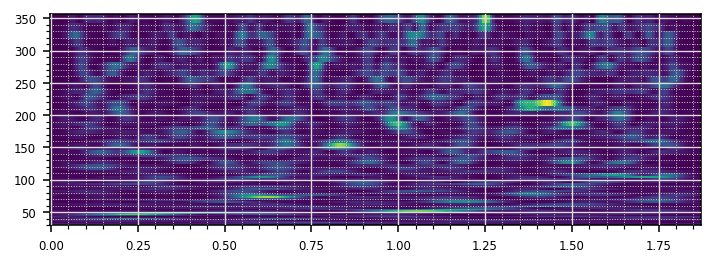

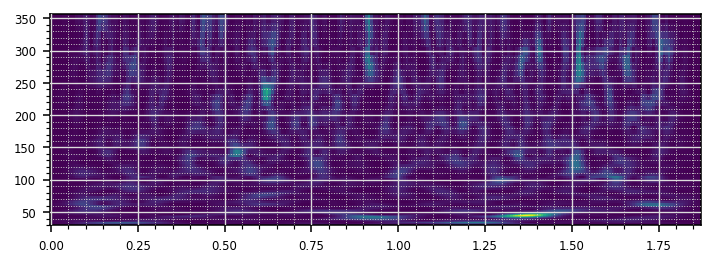

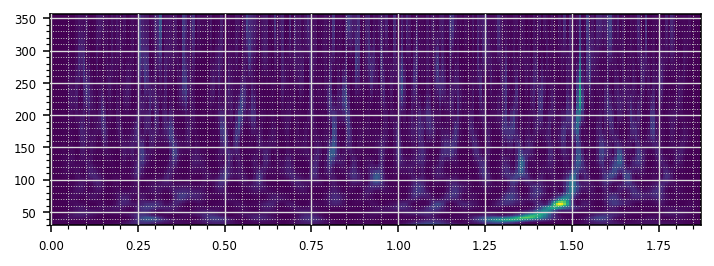

In [11]:
for i in range(gw_data.N_SIGNALS):
    plot_sig_q(test_filtered[i], avoid_normalization=False)

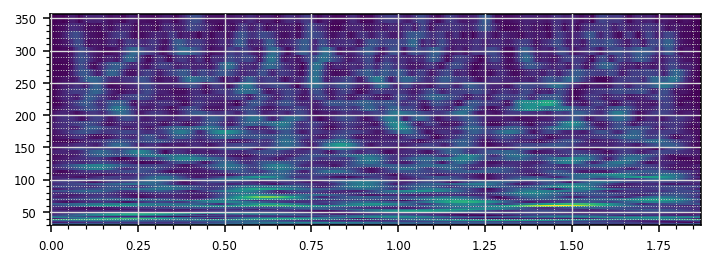

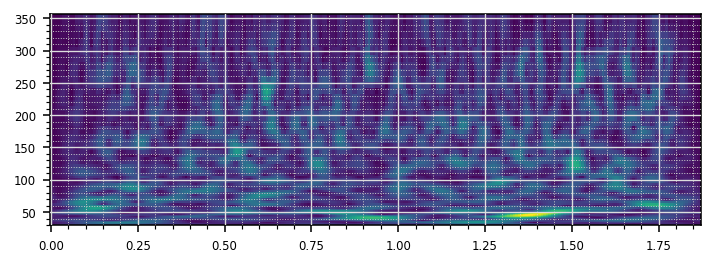

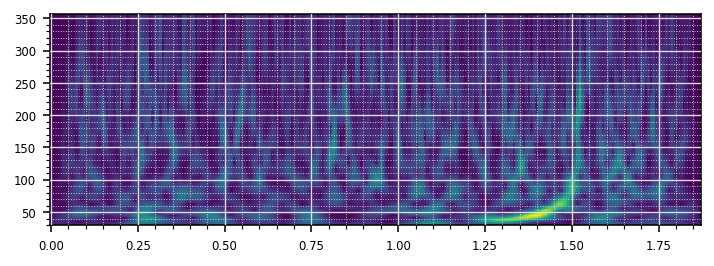

In [12]:
for i in range(gw_data.N_SIGNALS):
    plot_sig_q(test_filtered[i], avoid_normalization=True)